In [12]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
dataset = load_iris()

In [14]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(dataset.feature_names)
print(dataset.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [16]:
X = dataset.data
y = dataset.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [19]:
X = X[:, [2,3]]
X[:10,:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [21]:
print(X_train[:10,:])
print(y_train[:10])

[[1.  0.2]
 [1.5 0.4]
 [4.4 1.4]
 [1.6 0.2]
 [1.3 0.2]
 [5.  1.9]
 [4.5 1.5]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]
[0 0 1 0 0 2 1 0 0 0]


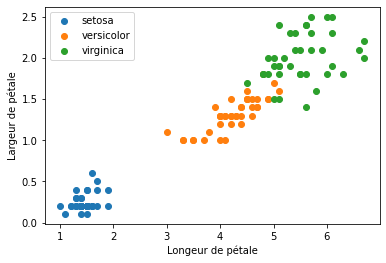

In [22]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label="setosa")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label="versicolor")
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], label="virginica")
plt.xlabel('Longeur de pétale')
plt.ylabel('Largeur de pétale')
plt.legend()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_t = sc.transform(X_train)
X_test_t = sc.transform(X_test)

X_train_t[:10,:]

array([[-1.56253475, -1.31260282],
       [-1.27600637, -1.04563275],
       [ 0.38585821,  0.28921757],
       [-1.2187007 , -1.31260282],
       [-1.39061772, -1.31260282],
       [ 0.72969227,  0.95664273],
       [ 0.44316389,  0.4227026 ],
       [-1.27600637, -1.31260282],
       [-1.33331205, -1.31260282],
       [-1.27600637, -1.44608785]])

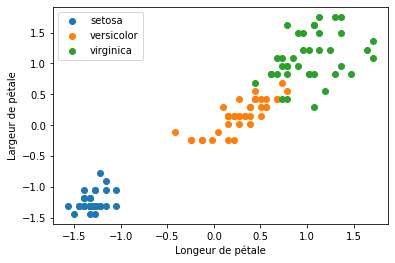

In [26]:
plt.scatter(X_train_t[y_train == 0, 0], X_train_t[y_train == 0, 1], label="setosa")
plt.scatter(X_train_t[y_train == 1, 0], X_train_t[y_train == 1, 1], label="versicolor")
plt.scatter(X_train_t[y_train == 2, 0], X_train_t[y_train == 2, 1], label="virginica")
plt.xlabel('Longeur de pétale')
plt.ylabel('Largeur de pétale')
plt.legend()
plt.show()

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(3, 3), alpha=1e-5, activation='logistic', shuffle=True, max_iter = 10000)

In [32]:
clf.fit(X_train_t, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [33]:
y_pred_test = clf.predict(X_test_t)
y_pred_train = clf.predict(X_train_t)

In [41]:
exactitude_test = accuracy_score(y_pred_test, y_test)
exactitude_train = accuracy_score(y_pred_train, y_train)
print("Exactitude", exactitude_train, exactitude_test)

Exactitude 0.95 1.0


In [48]:
clf.coefs_

[array([[ 1.91419533, -2.26692159,  1.37419386],
        [ 2.01345582, -2.53533885,  1.45096035]]),
 array([[-2.85293734,  2.02122613,  3.44547377],
        [ 1.84231851, -3.24382545, -1.51169098],
        [-1.95519941,  2.69816832,  2.15475356]]),
 array([[ 2.40590177,  0.49522972, -2.94881031],
        [-2.99959018,  2.72645423,  1.97843369],
        [-2.69710927, -1.61277204,  2.98079492]])]

In [50]:
clf.intercepts_

[array([-2.54954776, -3.10312065, -1.34574672]),
 array([ 1.82139644,  1.20626176, -2.59528971]),
 array([ 1.38368455, -0.08600894, -0.75496977])]

In [51]:
def plot_limite_decision(X, y, classifier, labels = {0:"setosa", 1:"versicolor", 2:"virginica"}):
    resolution=0.02
    
    # Création des marqueurs
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Affichage de la surface de décision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, cmap=cmap(idx),
                    marker=markers[idx], label=labels[cl])

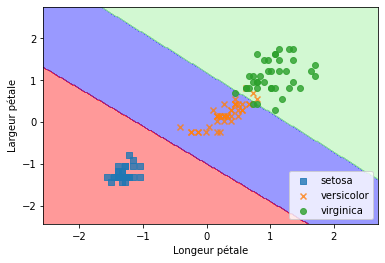

In [53]:
from matplotlib.colors import ListedColormap

plot_limite_decision(X=X_train_t, y=y_train, classifier=clf)
plt.xlabel('Longeur pétale')
plt.ylabel('Largeur pétale')
plt.legend(loc='lower right')
plt.show()

[[0.72969227 1.62406789]]
virginica


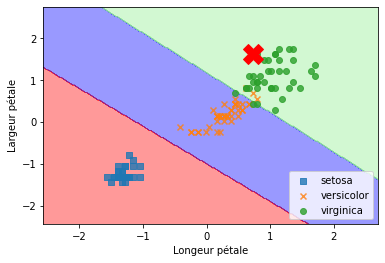

In [56]:
labels = {0:"setosa", 1:"versicolor", 2:"virginica"}
X_test = [5, 2.4] 

X_test_trans = sc.transform([X_test])
print(X_test_trans)
y_test_pred = clf.predict(X_test_trans)
print(labels[y_test_pred[0]])

plot_limite_decision(X=X_train_t, y=y_train, classifier=clf)
plt.plot(X_test_trans[0][0], X_test_trans[0][1], 'rX', markersize=20)
plt.xlabel('Longeur pétale')
plt.ylabel('Largeur pétale')
plt.legend(loc='lower right')
plt.show()